In [3]:
# Download all datasets in all years

# Assume we have the name of the company we want to check - Eg: Google
def process_data_on_company(company_name):

    # Collect all data about Google in different years

    # Process the data to have data visualization

    # return
    return

process_data_on_company('Google')

# Find a list of all companies

# For loop on each company => Get this result to the database on website

In [4]:
# Download all the dataset in different years
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data1 = pd.read_csv(file_path + 'LCA_FY2016.csv')
data1 = data1.rename({'CASE_SUBMITTED': 'RECEIVED_DATE', 'SOC_NAME': 'SOC_TITLE'}, axis=1)
data1.head()

data2 = pd.read_csv(file_path + 'LCA_FY2017.csv')
data2 = data2.rename({'CASE_SUBMITTED': 'RECEIVED_DATE', 'SOC_NAME': 'SOC_TITLE'}, axis=1)
data2.head()

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY
0,CERTIFIED-WITHDRAWN,2/24/16,10/1/16,3/1/16,H-1B,15-1121,COMPUTER SYSTEMS ANALYSTS,Y,DISCOVER PRODUCTS INC.,RIVERWOODS,IL,"65,811.00","67,320.00",Year,"59,197.00",Year
1,CERTIFIED-WITHDRAWN,3/4/16,10/1/16,3/8/16,H-1B,15-2031,OPERATIONS RESEARCH ANALYSTS,Y,DFS SERVICES LLC,RIVERWOODS,IL,"53,000.00","57,200.00",Year,"49,800.00",Year
2,CERTIFIED-WITHDRAWN,3/10/16,10/1/16,3/16/16,H-1B,15-1131,COMPUTER PROGRAMMERS,Y,EASTBANC TECHNOLOGIES LLC,WASHINGTON,DC,"77,000.00",0.00,Year,"76,502.00",Year
3,WITHDRAWN,9/28/16,10/1/16,NaN,H-1B,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,INFO SERVICES LLC,LIVONIA,MI,"102,000.00",0.00,Year,"90,376.00",Year
4,CERTIFIED-WITHDRAWN,2/22/15,10/2/16,2/26/15,H-1B,13-2041,CREDIT ANALYSTS,Y,BB&T CORPORATION,WILSON,NC,"132,500.00",0.00,Year,"116,605.00",Year


In [5]:
big_group_dict = {
    11: 'Management Occupations',
    13: 'Business and Financial Operations Occupations',
    15: 'Computer and Mathematical Occupations',
    17: 'Architecture and Engineering Occupations',
    19: 'Life, Physical, and Social Science Occupations',
    21: 'Community and Social Service Occupations',
    23: 'Legal Occupations',
    25: 'Educational Instruction and Library Occupations',
    27: 'Arts, Design, Entertainment, Sports, and Media Occupations',
    29: 'Healthcare Practitioners and Technical Occupations',
    31: 'Healthcare Support Occupations',
    33: 'Protective Service Occupations',
    35: 'Food Preparation and Serving Related Occupations',
    37: 'Building and Grounds Cleaning and Maintenance Occupations',
    39: 'Personal Care and Service Occupations',
    41: 'Sales and Related Occupations',
    43: 'Office and Administrative Support Occupations',
    45: 'Farming, Fishing, and Forestry Occupations',
    47: 'Construction and Extraction Occupations',
    49: 'Installation, Maintenance, and Repair Occupations',
    51: 'Production Occupations',
    53: 'Transportation and Material Moving Occupations'
}

In [6]:
def load_data(link):
    data = pd.read_csv(link)
    
    #TODO: Change this LATER
    data = data.rename({'CASE_SUBMITTED': 'RECEIVED_DATE', 'SOC_NAME': 'SOC_TITLE'}, axis=1)
    
    # Replace
    data = data.replace({np.nan: None})
    
    # Big group define
    data['BIG_GROUP_CODE'] = [int(i[0:2]) for i in data.SOC_CODE]
    data['BIG_GROUP_NAME'] = [big_group_dict[i] for i in data.BIG_GROUP_CODE]
    data['WAGE_RATE_OF_PAY_FROM'] = [convert_wage_str(i) for i in data.WAGE_RATE_OF_PAY_FROM]
    data['WAGE_RATE_OF_PAY_TO'] = [convert_wage_str(i) for i in data.WAGE_RATE_OF_PAY_TO]
    
    data = data.replace({np.nan: None})
    
    # Calculate average wage
    tmp = []
    for idx, row in data.iterrows():
        if (row.WAGE_RATE_OF_PAY_TO) is None:
            tmp.append(row.WAGE_RATE_OF_PAY_FROM)
        else:
            tmp.append((row.WAGE_RATE_OF_PAY_FROM + row.WAGE_RATE_OF_PAY_TO) / 2)
            
    data['AVERAGE_WAGE'] = tmp
    
    # Uppercase the CASE_STATUS
    
    # Convert datetime
    data.RECEIVED_DATE = pd.to_datetime(data.RECEIVED_DATE)
    data.DECISION_DATE = pd.to_datetime(data.DECISION_DATE)
    data.ORIGINAL_CERT_DATE = pd.to_datetime(data.ORIGINAL_CERT_DATE)
    
    return data

def convert_wage_str(wage_str):
    if wage_str is None:
        return None
    
    # Delete the dollar sign
    wage_str = wage_str[1:]
    
    wage_str = wage_str.replace(',', '')
    return float(wage_str)

def filter_data_by_company_name(data, company_name):
    return data[(data.EMPLOYER_NAME == company_name) & (data.VISA_CLASS == 'H-1B')]

# Company name
company_name = 'GOOGLE INC.'

# Load data
file_path = './filtered_columns_data/'
data2016 = load_data(file_path + 'LCA_FY2016.csv')
data2017 = load_data(file_path + 'LCA_FY2017.csv')

# Filter data of Google only
company_data_2016 = filter_data_by_company_name(data2016, company_name)
company_data_2017 = filter_data_by_company_name(data2017, company_name)

data = {
    2016: company_data_2016,
    2017: company_data_2017
}

TypeError: 'NoneType' object is not subscriptable

In [ ]:
company_data_2016.head()

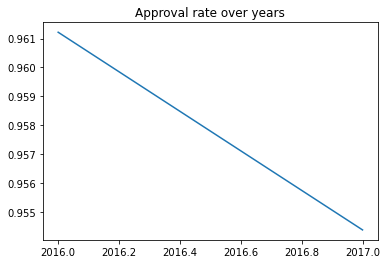

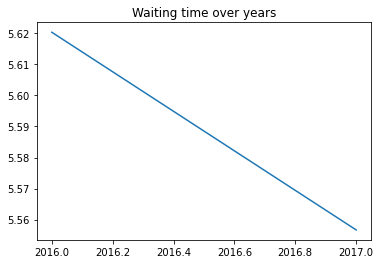

In [41]:
def approval_number(data):
    return len(data[data.CASE_STATUS == 'CERTIFIED']) + len(data[data.CASE_STATUS == 'CERTIFIED-WITHDRAWN'])

def approval_rate(data):
    return approval_number(data) / len(data)

def denial_number(data):
    return len(data[data.CASE_STATUS == 'DENIED'])

def calculate_approval_rate_over_years(data):
    approval_rate_over_years = []
    #approval_rate_res = 0
    years = []
    for year, data_year in data.items():
        approval_rate_res = approval_rate(data_year)
        years.append(year)
        approval_rate_over_years.append(approval_rate_res)
    return approval_rate_over_years, years

def plot_approval_rate_over_years(data):
    approval_rate_over_years, years = calculate_approval_rate_over_years(data)
    plt.plot(years, approval_rate_over_years)
    plt.title('Approval rate over years')
    plt.show()
    
plot_approval_rate_over_years(data)

def calculate_waiting_time(data):
    result = []
    for index, row in data.iterrows():
        if row.CASE_STATUS == 'CERTIFIED-WITHDRAWN':
            result.append((row.ORIGINAL_CERT_DATE - row.RECEIVED_DATE).days)
        elif row.CASE_STATUS == 'CERTIFIED':
            result.append((row.DECISION_DATE - row.RECEIVED_DATE).days)
    return np.mean(result)

def plot_waiting_time(data):
    result, years = [], []
    for year, data_year in data.items():
        years.append(year)
        result.append(calculate_waiting_time(data_year))
    plt.plot(years, result)
    plt.title('Waiting time over years')
    plt.show()

plot_waiting_time(data)    
#data2['ORIGINAL_CERT_DATE'] = pd.to_datetime(data2['ORIGINAL_CERT_DATE'])
#print(data2['ORIGINAL_CERT_DATE'])
# print(calculate_waiting_time(data[2017]))

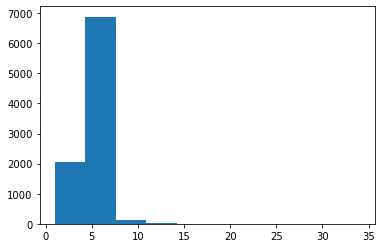

In [43]:
# testing different visualizations

import itertools
import seaborn as sns

def new_calculate_waiting_time(data):
    result = []
    for index, row in data.iterrows():
        if row.CASE_STATUS == 'CERTIFIED-WITHDRAWN':
            result.append(row.ORIGINAL_CERT_DATE - row.RECEIVED_DATE)
        elif row.CASE_STATUS == 'CERTIFIED':
            result.append(row.DECISION_DATE - row.RECEIVED_DATE)
    return result

def new_plot_waiting_time(data):
    result = []
    for year, data_year in data.items():
        result.append(new_calculate_waiting_time(data_year))
    result = list(itertools.chain(*result))
    converted_result = [i.days for i in result]
    #plt.boxplot(converted_result)
    plt.hist(converted_result)
    #plt.title('Waiting time')

new_plot_waiting_time(data)

What to display for each company report

Company name (EMPLOYER_NAME)
Yearly approval rate (a stacked bar graph?)
Results of each application (a table format?):
Did it get approved or declined? (CASE_STATUS)
How long did it take for the company to get its results? (DECISION_DATE - RECEIVED_DATE)
Job occupation title (SOC_TITLE)
Full-time/part-time (FULL_TIME_POSITION)
Wage range (WAGE_RATE_OF_PAY_FROM & WAGE_RATE_OF_PAY_TO & WAGE_UNIT_OF_PAY)
Was the company represented by a law firm? If so, which law firm? (AGENT_REPRESENTING_EMPLOYER & LAWFIRM_NAME_BUSINESS_NAME)


Do we need these?

prevailing wage (PREVAILING_WAGE & PW_UNIT_OF_PAY)
company location (STATE & CITY)

In [7]:
data_2021_Q1_csv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRnDXvhkC-RMEwqwbQ4xC0teS0iZpSTukb5vVYqnkg7ZQBWx7lyFdgeELQPTS8o08ZFbOdK-30W_i8j/pub?gid=450153887&single=true&output=csv'

# Company name
company_name = 'Google LLC'

file_path = './filtered_columns_data/'
data2021 = load_data(file_path + 'LCA_FY2021_Q1.csv')

# Filter data of Google only
company_data_2021 = filter_data_by_company_name(data2021, company_name)

data = {
    2021: company_data_2021
}


/var/folders/5q/2t52h3ys7ls1bg59n_dzc2680000gn/T/ipykernel_7730/343360145.py:7: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  data2021 = load_data(file_path + 'LCA_FY2021_Q1.csv')


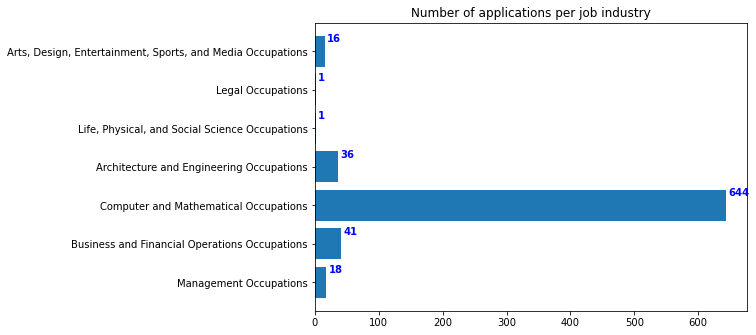

In [8]:
def plot_different_groups_applications_number(data, big_group_dict):
    # Find all uniques groups inside the data
    unique_groups = set(company_data_2021.BIG_GROUP_CODE)
    # Results
    applications_count = []
    
    # For each group, count how many applications
    for group_code in unique_groups:
        count = count_applications_on_CODE(group_code, data)
        applications_count.append(count)
        
    # Present the results
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    groups = [big_group_dict[i] for i in unique_groups] 
    ax.barh(groups, applications_count)
    for i, v in enumerate(applications_count):
        ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

    plt.title("Number of applications per job industry")
    plt.show()
    
def count_applications_on_CODE(group_code, data):
    return sum(data.BIG_GROUP_CODE == group_code)
    
plot_different_groups_applications_number(company_data_2021, big_group_dict)

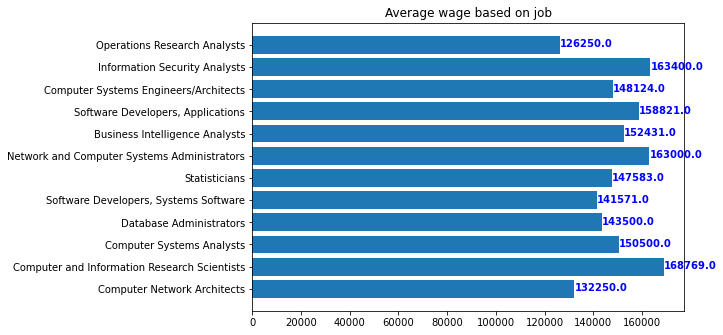

In [9]:
def plot_jobs_on_group(group_code, data):
    # Filter all applications with the same group code
    data = data.loc[data.BIG_GROUP_CODE == group_code]
    
    # Find all uniques job_code
    unique_job_titles = set(data.SOC_TITLE)
    
    # Get the job title based on job_code - later, if necessary
   
    # Calculate salary stats for each job code
    average_on_job = []
    jobs = []
    for job_title in unique_job_titles:
        jobs.append(job_title)
        average_on_job.append(calculate_salary_stats(job_title, data))
    # Plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.barh(jobs, average_on_job)
    for i, v in enumerate(average_on_job):
        ax.text(v + 3, i - .1 , str(v), color='blue', fontweight='bold')

    plt.title("Average wage based on job")
    plt.show()
    

def calculate_salary_stats(job_title, data):
    # Find all applications of specific job code
    new_data = data.loc[data.SOC_TITLE == job_title]
    # Collect all salaries
    salaries = new_data.AVERAGE_WAGE
    
    # Mean
    mean_salaries = np.round(np.mean(salaries))
    
    # Median
    median_salaries = np.round(np.median(salaries))
    
    # Min, Max
    min_salaries = min(salaries)
    max_salaries = max(salaries)
    
    # 95 Confidence Interval
    
    return mean_salaries

plot_jobs_on_group(15, company_data_2021)